# Advection-diffusion with Fourier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [2]:
def do_integration(f_init, dt, n, dx, v, D, T, update = 'semi-implicit', make_plot = False):
    
    if make_plot:
        %matplotlib

    g = np.fft.fft(f_init)
    k = np.fft.fftfreq(n) * 2*np.pi/dx
    J = complex(0,1)

    nsteps = int(T/dt)
    dt = T/nsteps  # make sure we end at the required time t=T

    for i in range(nsteps):

        dg = -J*k*v - D*dx*k*k

        match update:
            case 'explicit':
                g = g * (1 + dt*dg)
            case 'implicit':
                g = g / (1 - dt*dg)
            case 'semi-implicit':
                g = g * (1 + 0.5*dt*dg) / (1 - 0.5*dt*dg)
    
        if make_plot:
            if (i % (nsteps//(10*T)) == 0) or (i == (nsteps-1)):
                f = np.fft.ifft(g)
                plt.clf()
                plt.plot(x,f_init, ":")
                plt.plot(x,f)
                plt.title('t=%.3lg' % ((i+1) * T/nsteps))
                plt.pause(1e-3)
    
    if make_plot:
        plt.close()
        %matplotlib inline

    return np.fft.ifft(g)

In [3]:
def plot_one(x, f_init, f):
    plt.plot(x, np.real(f_init), ":")
    plt.plot(x, np.real(f))

In [4]:
def plot_grid(v, D, T, dt_frac):
    # set up the grid
    n = 128
    x = np.linspace(0,1,n)
    dx = x[1]-x[0]

    # timestep
    dt1 = (dx**2)/(D + 1e-15)
    dt2 = dx/(abs(v) + 1e-15)
    dt = dt_frac * min(dt1,dt2)

    updates = ['explicit', 'implicit', 'semi-implicit']

    plt.clf()
    plt.figure(figsize = (10,8))
    plt.suptitle('v=%lg, D=%lg, dt_frac=%lg' % (v, D, dt_frac))
    
    count = 0

    for update in updates:
    
        # Gaussian
        f_init = np.exp(-(x-0.5)**2/0.05**2)
        f = do_integration(f_init, dt, n, dx, v, D, T, update = update)
        plt.subplot(3,3,count*3 + 1)
        plot_one(x, f_init, f)

        # Step
        f_init = np.zeros_like(x)
        f_init[n//4:3*n//4] = 1
        f = do_integration(f_init, dt, n, dx, v, D, T, update = update)
        plt.subplot(3,3,count*3 + 2)
        plot_one(x, f_init, f)
        plt.title(update)

        # sin
        f_init = np.sin(2*np.pi*1.5*x)
        f = do_integration(f_init, dt, n, dx, v, D, T, update = update)
        plt.subplot(3,3,count*3 + 3)
        plot_one(x, f_init, f)

        count +=1
    
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

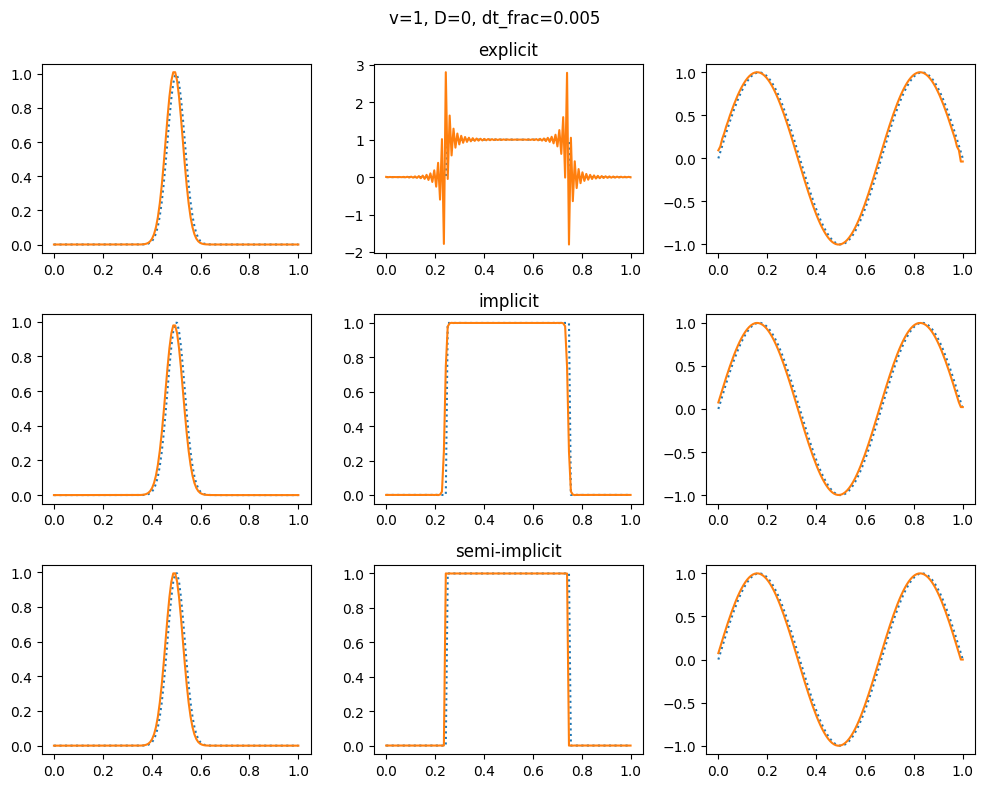

<Figure size 640x480 with 0 Axes>

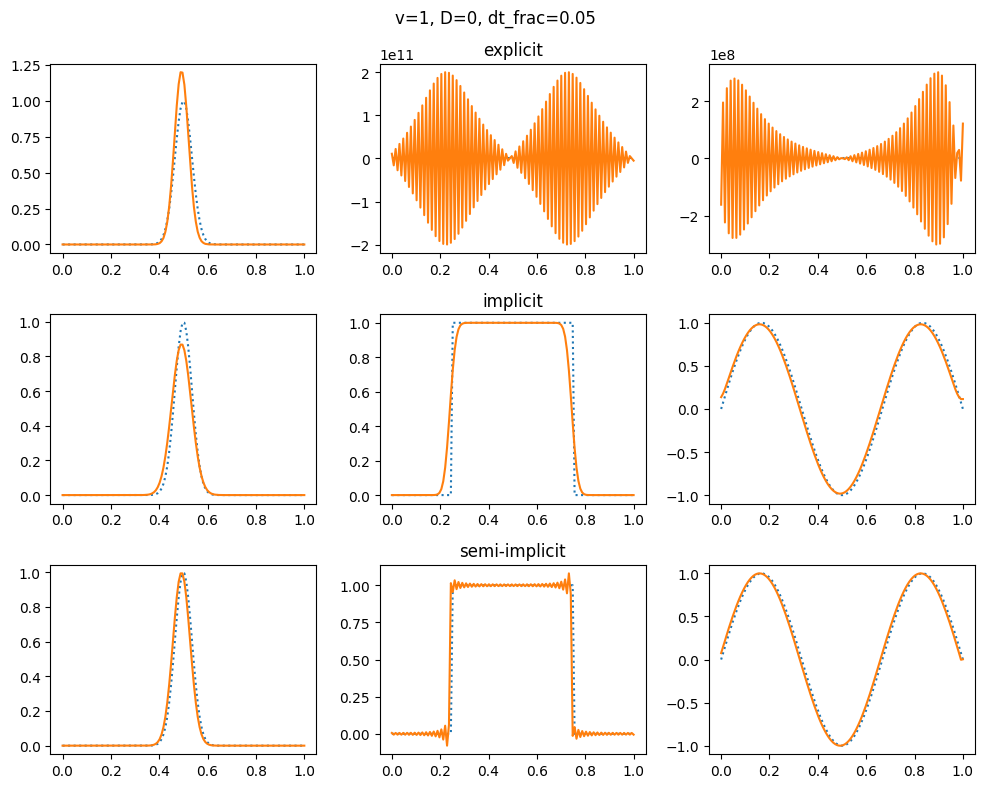

<Figure size 640x480 with 0 Axes>

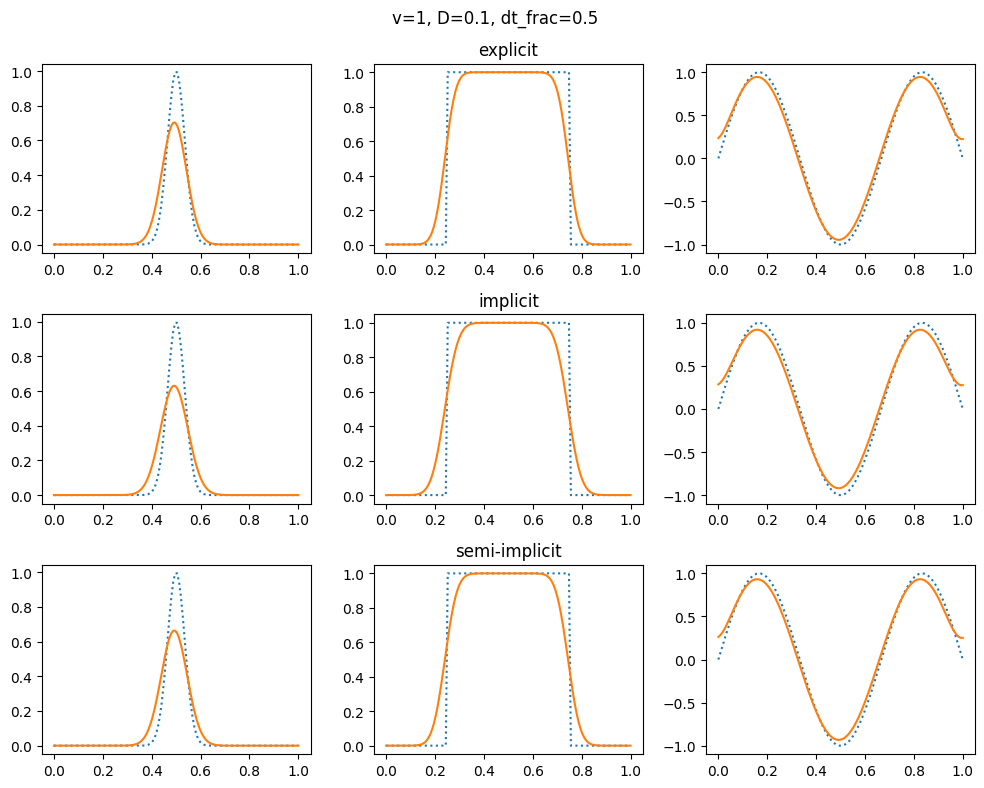

<Figure size 640x480 with 0 Axes>

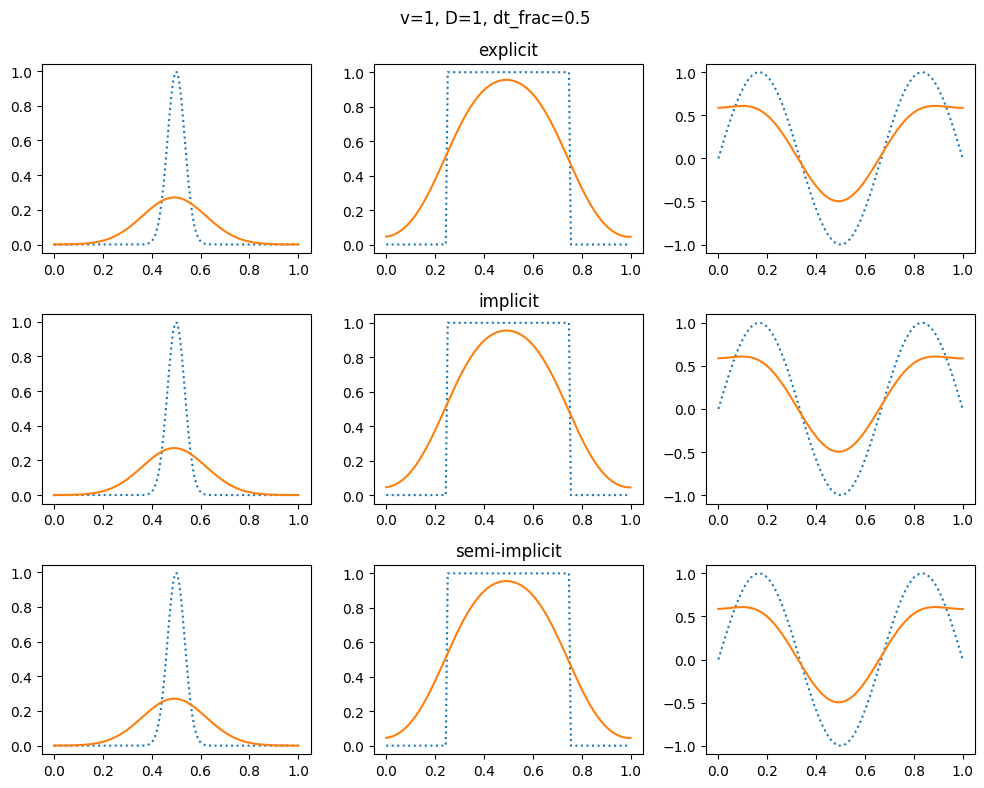

In [5]:
# parameters are: v, D, T, dt_frac
plot_grid(1.0, 0.0, 1.0, 0.005)
plot_grid(1.0, 0.0, 1.0, 0.05)
plot_grid(1.0, 0.1, 1.0, 0.5)
plot_grid(1.0, 1.0, 1.0, 0.5)
